# Test Campaign Planning
Planning for a standard DVS test campaign. Direct queries to aph@sarao.ac.za.

                                                              As on 30/04/2025

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

In [2]:
import katpoint
from dvs import planning, cattools

/home/aph/work/dvs/libraries/analysis/katsemodels.py:1212: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/analysis/katsemodels.py:1212: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


In [3]:
## Some available catalogues:
!ls ../catalogues

arrays					    sources_all.csv
fluxmodels.csv				    targets_pnt_Ku.csv
i_aor_e_330.50_is-904_20250204_235305.txt   targets_pnt_L.csv
i_aor_e_359.00_is-1002_20250204_235305.txt  targets_pnt_S.csv
rfi_mask.txt				    targets_pnt_XXX.csv


In [4]:
def mkTobs(start):
    """ @param start: "YYYY-MM-DD" or "YYYY-MM-DD HH:mm:ss"
        @return: (Tstart, Tstop) in UTC seconds """
    day_startend = ["00:00:00", "23:59:59"] # UTC times to start & stop each day's assessment
    if (" " in start): # Day + time of day
        start, day_startend[0] = start.split(" ")
    # Alternative for specifying a time in UTC: np.datetime64(f"{day}T{_}").astype(float)
    return [katpoint.Timestamp(f"{start} {_}").secs for _ in day_startend]  # Start & stop, in UTC seconds


# The calendar day from midnight to midnight
Tobs = mkTobs("2024-07-25")

# OR from a particular day & time till end of that day
Tobs = mkTobs("2024-07-25 22:00:00")

# OR right now for next 1hour
#Tobs = katpoint.Timestamp().secs + np.arange(0,2)*3600

## What's up?

In [ ]:
Tobs = [katpoint.Timestamp().secs]
planning.radiosky(Tobs[0], f_MHz=3000, catfn="../catalogues/targets_pnt_L.csv", el_limit_deg=20, tabulate=True)

## Pointing Measurements

Using  ../catalogues/targets_pnt_L.csv
  # PKS 1830-210, tags=radec, 18:33:39.92 -21:03:40.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd018db4af0>]
  # DVS B2-42 (1827-360, PKS 1827-360), tags=radec, 18:30:58.88 -36:02:30.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd018db4af0>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'PKS 1830-210' body=radec at 0x7fd018d74640>
 <katpoint.Target 'DVS B2-42' body=radec at 0x7fd018d80640>]


/home/aph/venv-py3/lib/python3.10/site-packages/katpoint/pointing.py:340: FutureWarning: Pointing model parameters that are not being fitted will be kept in future and not zeroed - zero the model beforehand instead
  warnings.warn('Pointing model parameters that are not being fitted will be kept in '


  # PKS 1830-210, tags=radec, 18:33:39.92 -21:03:40.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd018dd02e0>]
  # DVS B2-16 (J1924-2914, PKS J1924-2914, OV-236), tags=radec gaincal, 19:24:51.06 -29:14:30.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd018dd02e0>]
  # DVS B2-42 (1827-360, PKS 1827-360), tags=radec, 18:30:58.88 -36:02:30.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd018dd02e0>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'PKS 1830-210' body=radec at 0x7fd018d74640>
 <katpoint.Target 'DVS B2-16' body=radec at 0x7fd018d746a0>
 <katpoint.Target 'DVS B2-42' body=radec at 0x7fd018d80640>]


/home/aph/venv-py3/lib/python3.10/site-packages/katpoint/pointing.py:340: FutureWarning: Pointing model parameters that are not being fitted will be kept in future and not zeroed - zero the model beforehand instead
  warnings.warn('Pointing model parameters that are not being fitted will be kept in '


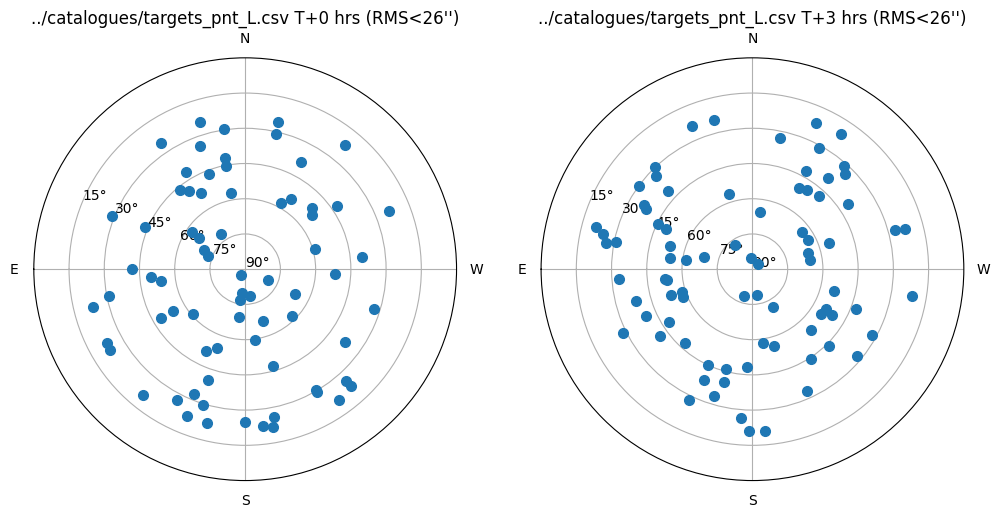

In [5]:
# See which of the two sessions will get better sky coverage using this catalogue:
Tobs = mkTobs("2024-07-20")
planning.sim_pointingmeasurements("../catalogues/targets_pnt_L.csv", Tstart=Tobs[0], Hr=3, S=2, el_limit_deg=15, sunmoon_separation_deg=10,
                                  rms_error_arcsec=5) # Centroid fitting accuracy ~ FWHM/SNR ~5arcsec at 3GHz & Tsys~20K

Using  ../catalogues/targets_pnt_Ku.csv
  # PKS 1830-210, tags=radec gaincal, 18:33:39.92 -21:03:40.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd1752b4f70>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'PKS 1830-210' body=radec at 0x7fd175223070>]
  # PKS 1830-210, tags=radec gaincal, 18:33:39.92 -21:03:40.1, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7fd17529b190>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'PKS 1830-210' body=radec at 0x7fd175223070>]


/home/aph/venv-py3/lib/python3.10/site-packages/katpoint/pointing.py:340: FutureWarning: Pointing model parameters that are not being fitted will be kept in future and not zeroed - zero the model beforehand instead
  warnings.warn('Pointing model parameters that are not being fitted will be kept in '
/home/aph/venv-py3/lib/python3.10/site-packages/katpoint/pointing.py:340: FutureWarning: Pointing model parameters that are not being fitted will be kept in future and not zeroed - zero the model beforehand instead
  warnings.warn('Pointing model parameters that are not being fitted will be kept in '


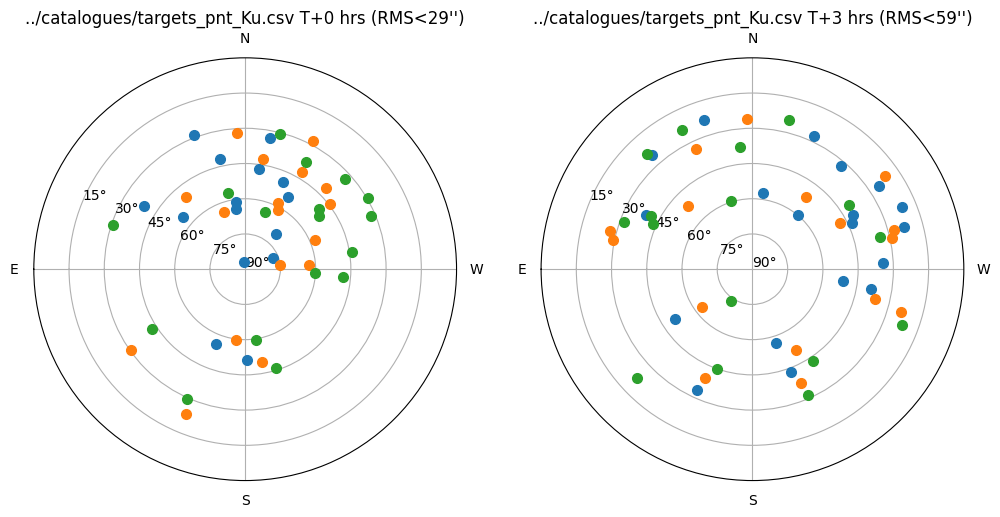

In [6]:
# This catalogue has fewer targets,so multiple visits (different colours) to the targets in each session
planning.sim_pointingmeasurements("../catalogues/targets_pnt_Ku.csv", Tstart=Tobs[0], Hr=3, S=2, el_limit_deg=15, sunmoon_separation_deg=10,
                                  rms_error_arcsec=8) # Centroid fitting accuracy ~ FWHM/SNR ~8arcsec at 13GHz & Tsys~150K

## Tip curve measurements

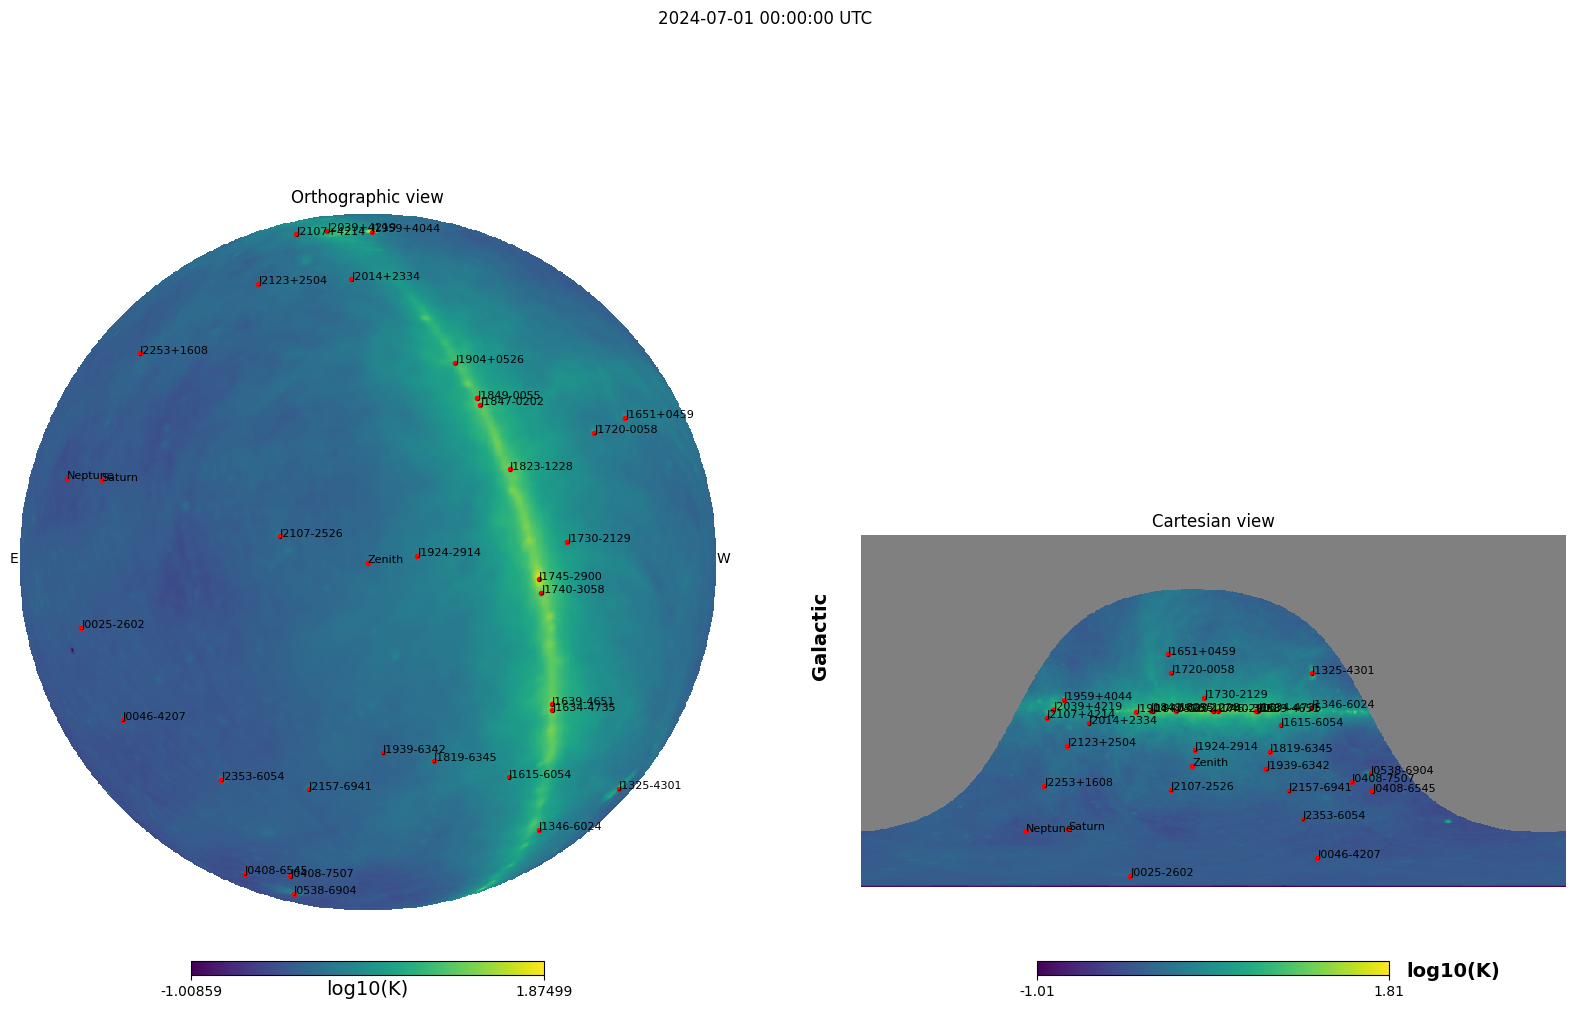

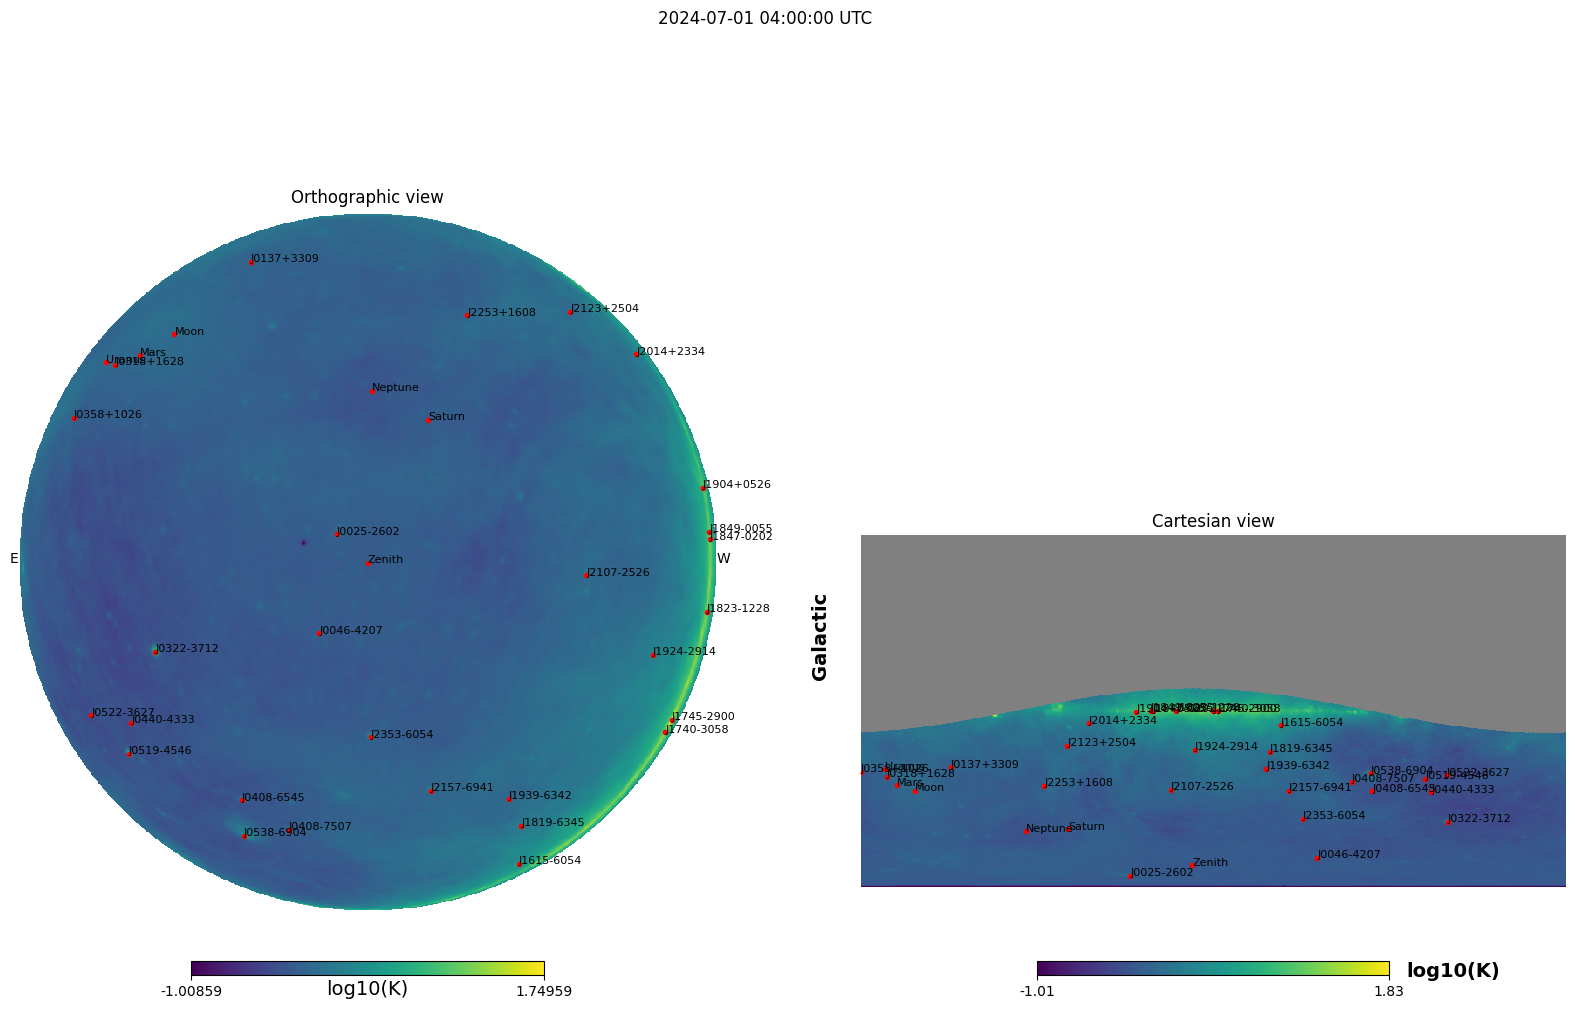

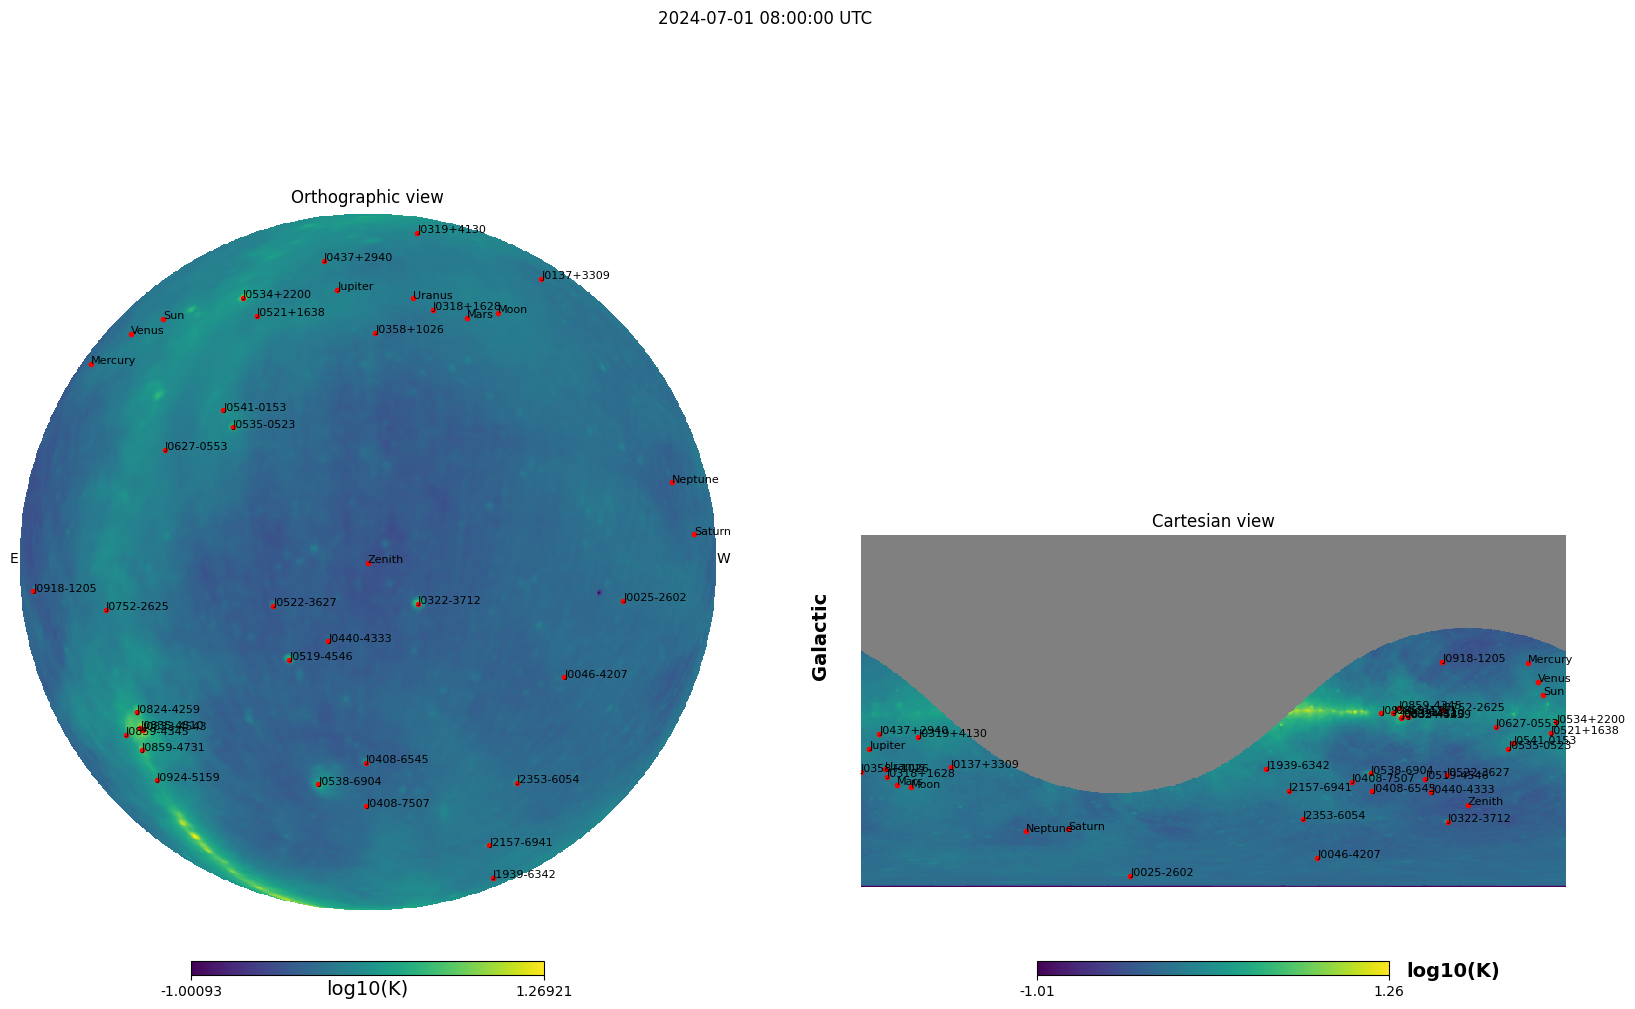

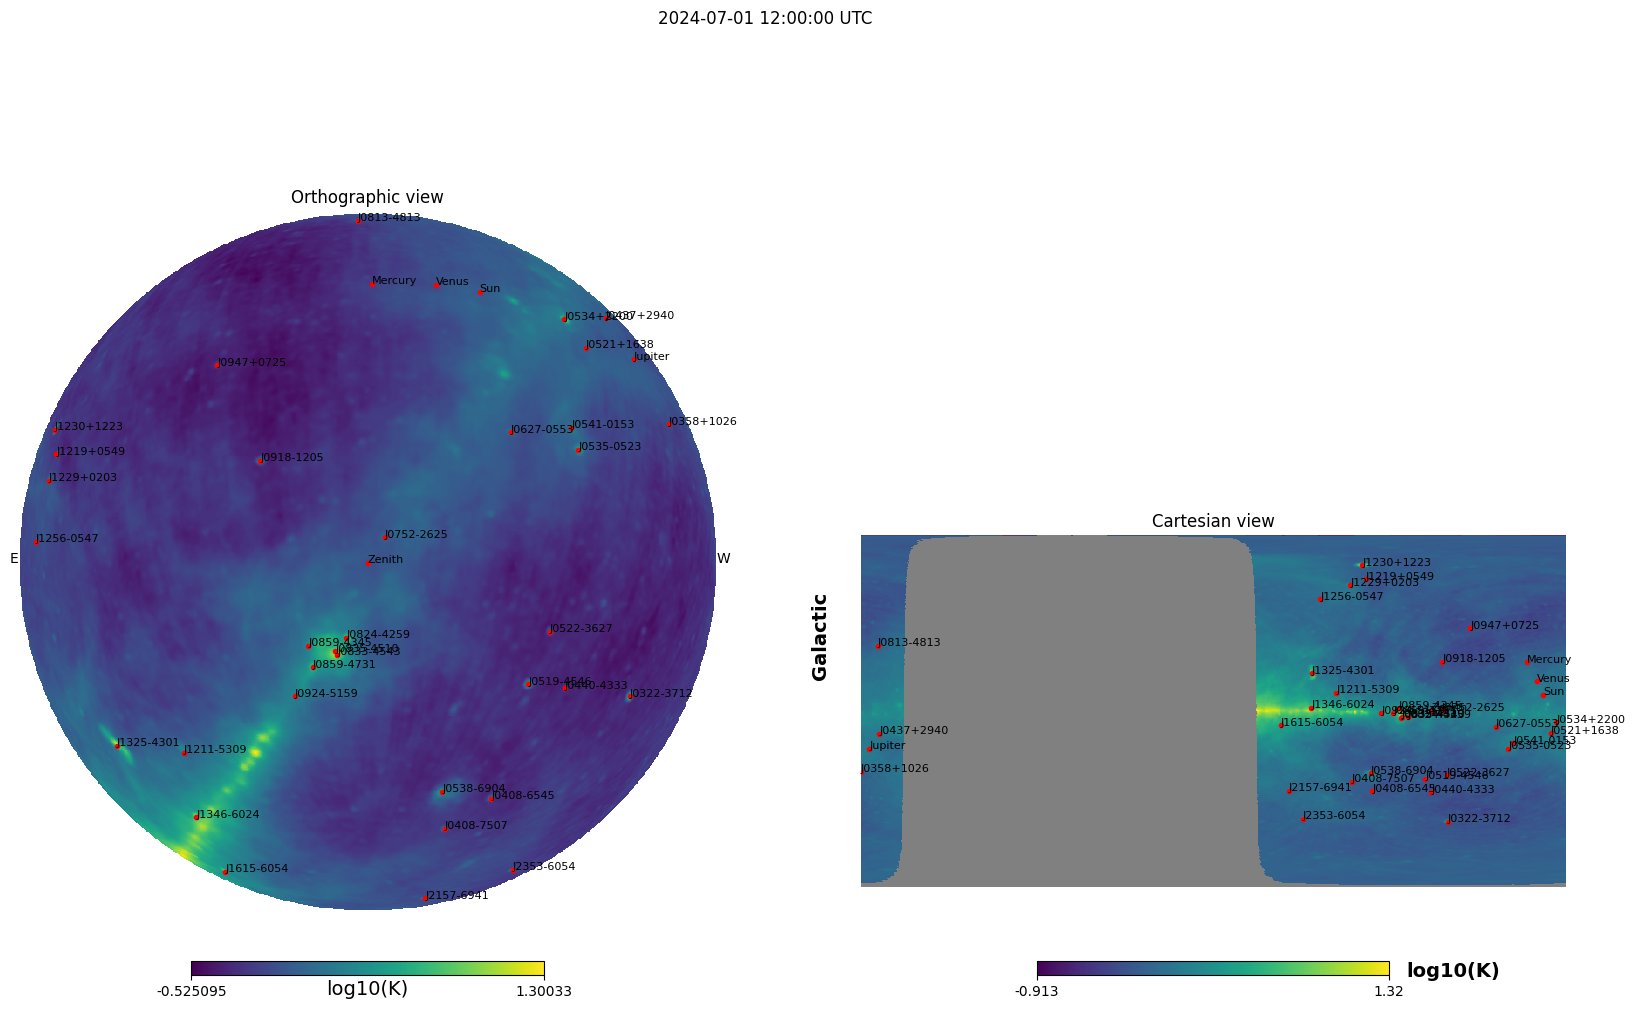

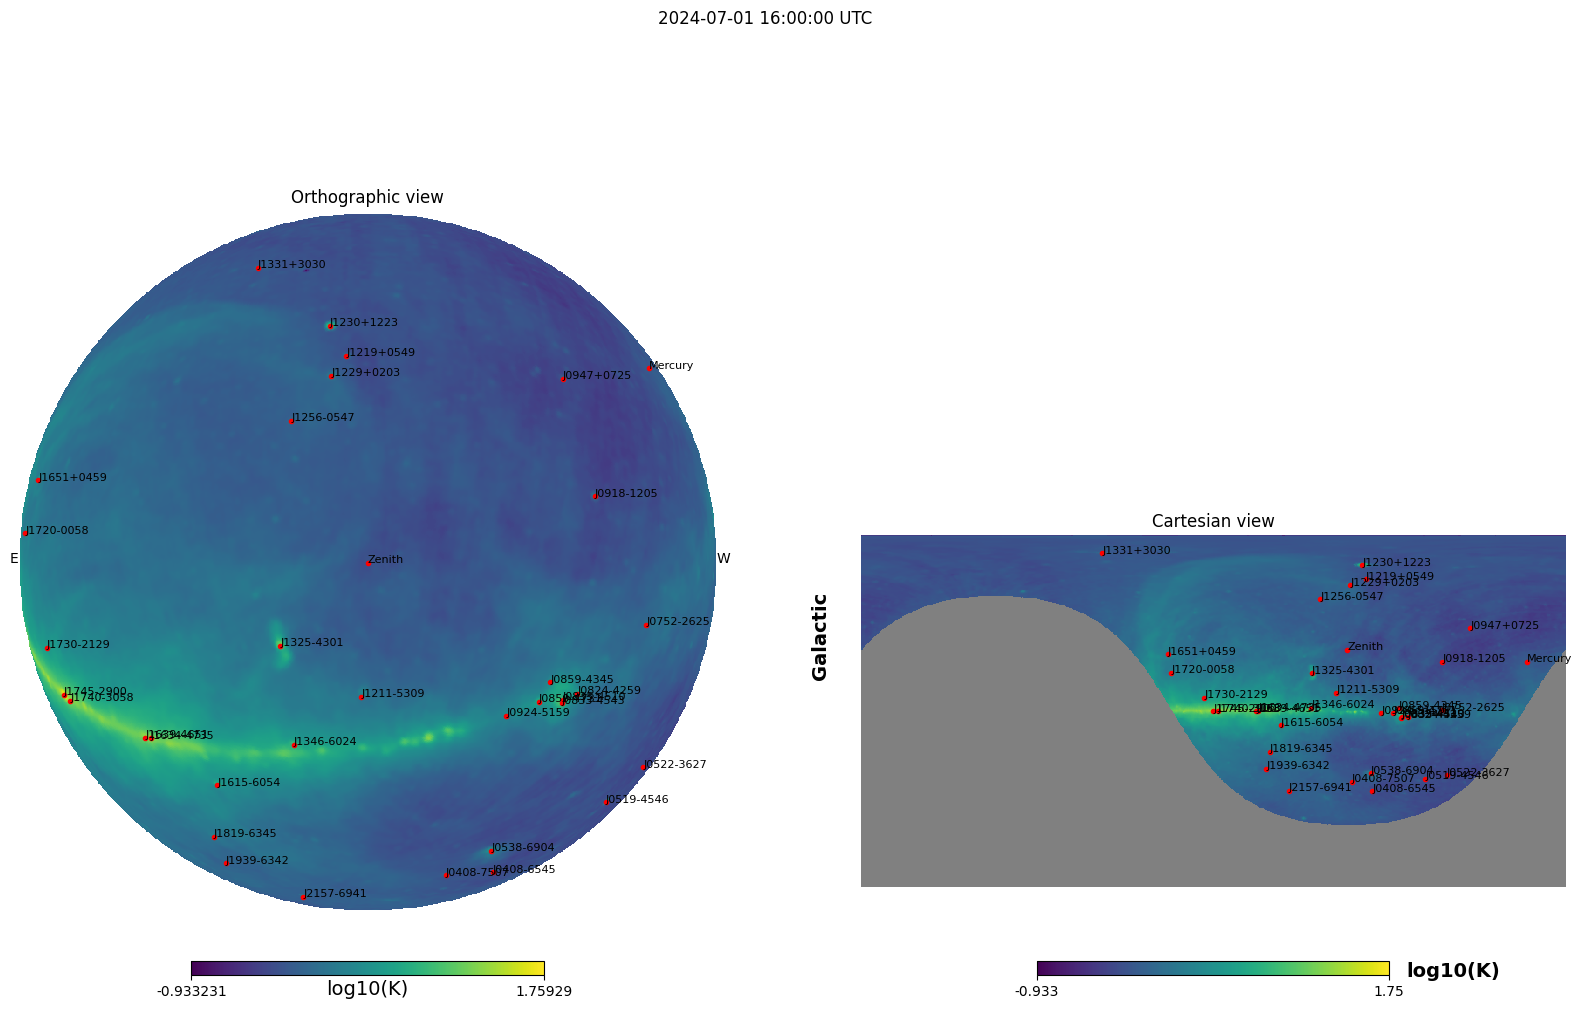

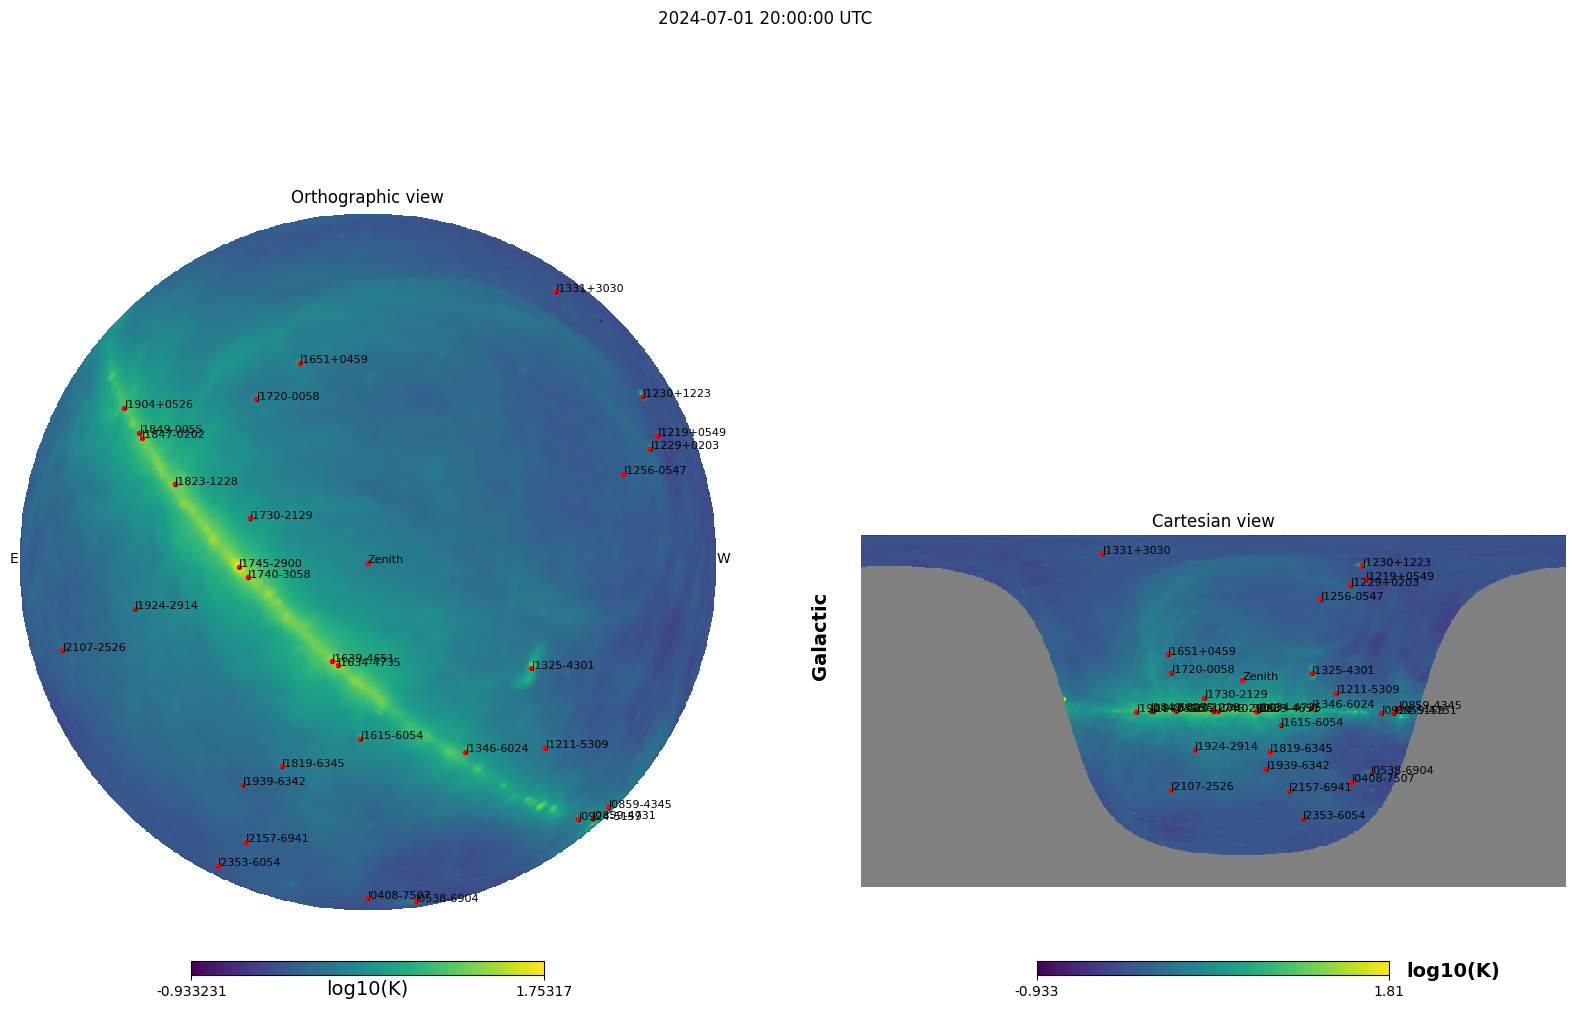

In [7]:
# The calendar day to run the assessment for
Tobs = mkTobs("2024-07-01")

# Want to pick a time of day and an azimuth angle that doesn't cross the galaxy or the Sun!
for T in np.arange(Tobs[0], Tobs[-1], 4*60*60): # Consider 4 hourly intervals
    planning.radiosky(T, f_MHz=1400, catfn="../catalogues/sources_all.csv", el_limit_deg=10, tabulate=False)
    plt.suptitle("%s UTC"% katpoint.Timestamp(T))

## Drift Scans / Holography

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz] | Flux [Jy@1GHz]
--------------------------------------------------------------------------------
    J2253+1608 | 2024/7/20 21:29:25 | 2024/7/21 05:34:53 |                    77.1 | nan
    J1924-2914 | 2024/7/20 16:07:53 | 2024/7/21 04:00:01 |                    76.5 | nan
    J2136+0041 | 2024/7/20 19:27:59 | 2024/7/21 05:02:12 |                    87.3 | nan
    J0137+3309 | 2024/7/20 01:34:22 | 2024/7/21 07:00:46 |                   -41.2 | nan
      1934-638 | 2024/7/20 14:14:52 | 2024/7/21 06:23:34 |                    38.9 | nan
    J2136+0041 | 2024/7/20 19:27:59 | 2024/7/21 05:02:12 |                    87.3 | nan
    J1256-0547 | 2024/7/20 10:32:40 | 2024/7/20 20:39:25 |                   -51.3 | nan
  PKS 0723-008 | 2024/7/20 05:15:04 | 2024/7/21 14:54:08 |                   -87.7 | nan
    J0408-6545 | 2024/7/20 22:23:11 | 2024/7/21 15:06:02 |                   -34.2 | nan
    J1424-4913 | 2

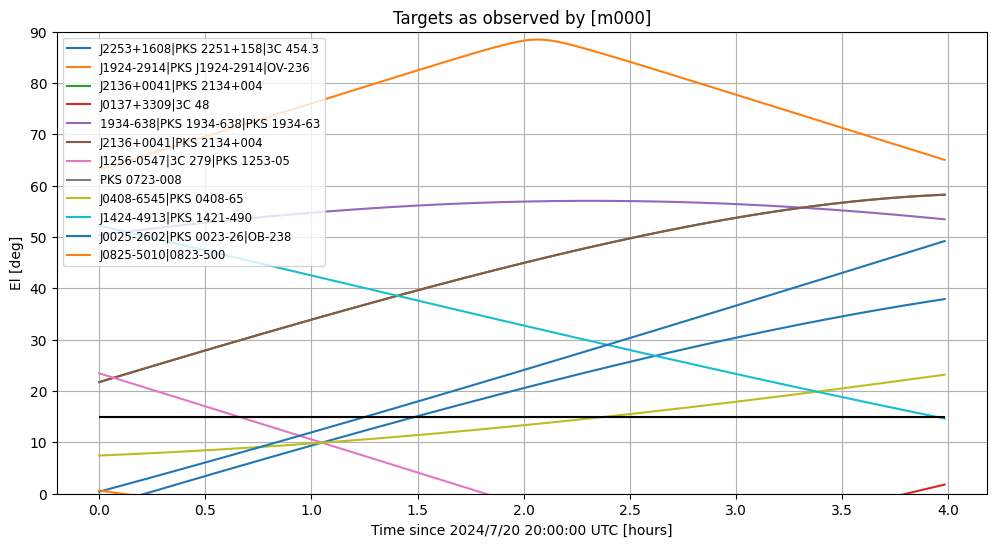

In [8]:
# Holography targets
# in order of brightness, per Mattieu de Villiers 2025
lbandtargets = "3C 273|PKS 0408-65|PKS 1934-63|Hyd A|3C 279|PKS 0023-26|J0825-5010|PKS J1924-2914"
sbandtargets = "3C 454.3|PKS J1924-2914|J2136+0041|J0137+3309|PKS 1934-63|PKS 2134+004|3C 279|PKS 0723-008|PKS 0408-65|PKS 1421-490|PKS 0023-26|J0825-5010"

Tobs = mkTobs("2024-07-20")
Tobs = katpoint.Timestamp("2024-07-20 20:00:00").secs + np.arange(5)*3600

planning.describe_target(sbandtargets,
                         catfn="../catalogues/targets_pnt_S.csv", horizon_deg=15,
                         date=Tobs[0], end_date=Tobs[-1], figsize=(12,6));

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@3GHz] | Flux [Jy@3GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 07:29:32 |  2024/7/2 13:47:31 |                   152.6 | nan
    J0534+2200 |  2024/7/1 06:19:08 |  2024/7/2 12:37:54 |                  -148.2 | 750.5
    J0535-0523 |  2024/7/1 04:52:08 |  2024/7/1 14:09:48 |                  -158.6 | 420.0
    J0918-1205 |  2024/7/1 08:18:39 |  2024/7/1 18:07:38 |                   251.1 | 21.0
    J1651+0459 |  2024/7/1 16:32:53 |  2024/7/2 00:57:09 |                   195.7 | 21.1
    J0519-4546 |  2024/7/1 03:06:57 |  2024/7/1 15:23:09 |                  -121.1 | 24.9
    J1230+1223 |  2024/7/1 12:35:45 |  2024/7/1 20:15:06 |                   257.7 | 111.9
    J1939-6342 |  2024/7/1 16:24:30 |  2024/7/2 06:43:20 |                   -94.3 | 11.2
    J0408-6545 |  2024/7/1 00:42:50 |  2024/7/1 15:23:38 |                   -93.6 | 6.6


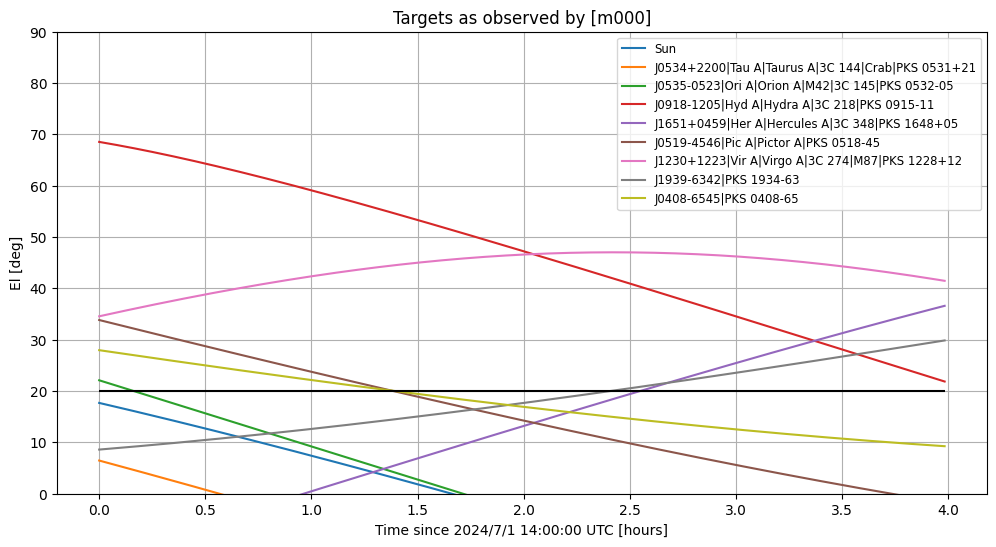

In [9]:
# Drift scan targets
Tobs = mkTobs("2024-07-01")
Tobs = katpoint.Timestamp("2024-07-01 14:00:00").secs + np.arange(5)*3600

planning.describe_target("Sun|Taurus A|Orion A|Hydra A|Hercules A|Pictor A|Virgo A|PKS 1934-63|J0408-6545",
                         catfn="../catalogues/sources_all.csv", horizon_deg=20, 
                         date=Tobs[0], end_date=Tobs[-1], freq=3e9, figsize=(12,6));

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@3GHz] | Flux [Jy@3GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 06:58:28 |  2024/7/1 14:18:01 |                   152.6 | nan
          Moon |  2024/7/1 02:17:10 |  2024/7/2 11:00:41 |                  -228.8 | nan
       Mercury |  2024/7/1 08:15:21 |  2024/7/1 15:38:50 |                   208.5 | nan
         Venus |  2024/7/1 07:32:47 |  2024/7/1 14:48:10 |                   178.8 | nan
          Mars |  2024/7/1 02:45:50 |  2024/7/2 10:53:53 |                  -246.1 | nan
       Jupiter |  2024/7/1 04:35:23 |  2024/7/2 12:04:06 |                  -200.0 | nan
        Saturn | 2024/6/30 22:16:11 |  2024/7/2 08:19:27 |                  -261.6 | nan
        Uranus |  2024/7/1 03:35:13 |  2024/7/2 11:18:25 |                  -230.3 | nan
       Neptune | 2024/6/30 23:05:07 |  2024/7/2 08:45:22 |                  -263.1 | nan
        Zenith |  

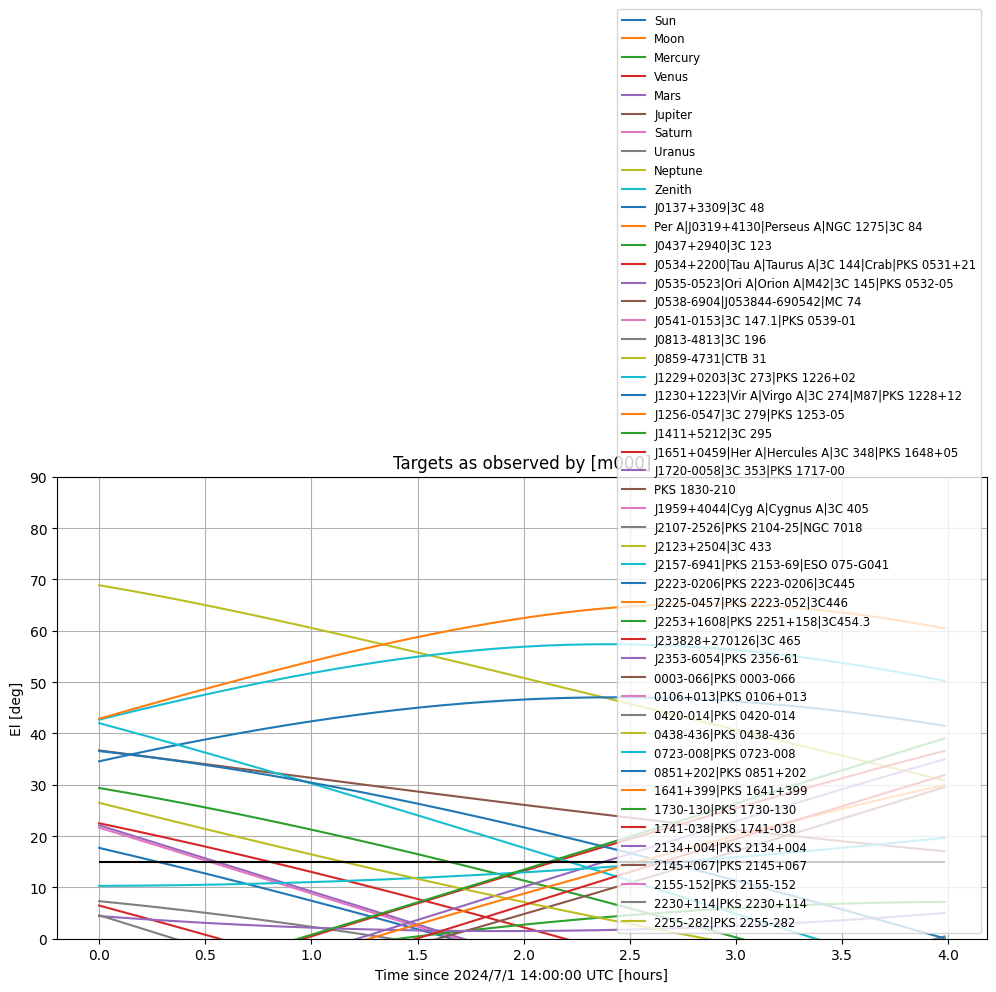

In [10]:
# When during the day will there be more targets at high elevation?
planning.describe_target("*",
                         catfn="../catalogues/targets_pnt_Ku.csv", horizon_deg=15, catant="m000, -30.713, 21.444, 1050.0",
                         date=Tobs[0], end_date=Tobs[-1], freq=3e9, figsize=(12,6));

## Holography Scan Patterns

Note for the examples below: sample_time is used to "simulate" dump_time for this "debug plot" mode.

1. Keep scanspeed <= 0.2deg/sec to ensure the drive system remains accurate.
2. scanspeed*dump_time represents the measurement's smearing of the far field pattern. Keep this below HPBW/3 or you'll lose resolution!
   * One symptom if this is too fast, is that the boresight amplitudes may show cycles, since the boresight measurement is actually averaged over
   more than just the central part of the main lobe, and if the timing is off (due to pointing offset) or if the main lobe has rotational asymmetry
   then "cyclical dips" will be seen - which is interpreted as low SNR.
3. Keep the bore sight visiting interval shorter than the time over which the visibility phase changes by 180deg (3.1rad), to avoid ambiguous phase wraps.
   For twistfactor=1 a reasonable approximation is T_bore_sight ~= 2.4*extent / scan_speed, so use this to determine the range of extents that can be practically measured. 
4. Choose cycle-duration for uniform sampling i.e. to match density in "radial & tangential" directions, when sample_time=planned dump_time
5. For satellite beacons, use 4k modes for best SNR; for continuum targets use 1k modes to reduce the data volume.

For non-geostationary targets:
1. Use --num-cycles 1 if the target is setting (the observe script currently handles --cycle-rotation correctly only for rising and transiting targets)
2. Add  --high-elevation-slowdown-factor 2 


Band2: HPBW>0.8deg; T_bore_sight~500..800sec
* scanspeed*dump_time <= 0.2 [deg]
* max extent <= 214*scan_speed [deg] (i.e. up to 42deg)

S-band: HPBW>0.4deg; T_bore_sight~500..800sec
* scanspeed*dump_time <= 0.13 [deg]
* max extent <= (208..333)*scan_speed [deg] (i.e. 27..42 deg)

Ku-band: HPBW>0.11deg; T_bore_sight~200..500sec
* scanspeed*dump_time <= 0.035 [deg]
* max extent <= 208*scan_speed [deg] (i.e. 2.9..7.3 deg)

In [11]:
def simulate_holog(script_args, target_def=None, start_time=None):
    """ Simulates a planned holography run. If the target defintion and start time is given, it will assess
        whether it is expected to be successful or not -- use this for low and high elevation angles!
        
        Use like:
            simulate_holog("--scan-extent 9 --cycle-duration 5400 --scanspeed 0.05  --slewspeed -2 --tracktime 10 --num-cycles 2 --cycle-rotation 2 --twistfactor 1 --high-elevation-slowdown-factor 1",
                   "PKS J1924-2914, radec, 19:24:0, -29:14:0", katpoint.Timestamp("2025-02-16 02:30:0").secs)
               
        @return: success, is_rising, duration_secs, mean_elev, closest_sun_distance """
    
    %run ~/work/katsdpscripts/observation/holography_scan.py {script_args}

    if (target_def is None) or (start_time is None):
        return
    
    currentaz, currentel = 0, 0 # Makes minor difference to estimated actual start time
    target_sun = katpoint.Target("Sun, special")
    arraycenter_antenna = katpoint.Antenna("M0, -30.713, 21.444, 1050.0, 13.5")

    # The following is copied with two HACKs from holography_scan.py
    def test_target_azel_limits(target,clip_safety_margin,min_elevation,max_elevation):
        if opts.kind=='horizon_scan':#override, tight margins needed
            clip_safety_margin=0.5
        now=start_time #time.time() ## HACK 1
        targetazel=gen_track([now],target)[0][1:]
        print("Target az,el at start time", targetazel) # HACK 2
        slewtotargettime=np.max([0.5*np.abs(currentaz-targetazel[0]),1.*np.abs(currentel-targetazel[1])])+1.0#antenna can slew at 2 degrees per sec in azimuth and 1 degree per sec in elev
        starttime=now+slewtotargettime+opts.cycle_tracktime
        targetel=np.array(target.azel([starttime,starttime+1.])[1])*180.0/np.pi
        rising=targetel[1]>targetel[0]
        if rising:#target is rising - scan top half of pattern first
            cx=compositex
            cy=compositey
        else:  #target is setting - scan bottom half of pattern first
            cx=[com[::-1] for com in compositex[::-1]]
            cy=[com[::-1] for com in compositey[::-1]]
        meanelev=np.zeros(len(cx))
        minsunangle=np.zeros(len(cx))
        for iarm in range(len(cx)):#spiral arm index
            scan_data,clipping_occurred = gen_scan(starttime,target,cx[iarm],cy[iarm],timeperstep=opts.sampletime,high_elevation_slowdown_factor=opts.high_elevation_slowdown_factor,clip_safety_margin=clip_safety_margin,min_elevation=min_elevation,max_elevation=max_elevation)
            meanelev[iarm]=np.mean(scan_data[:,2])
            #if sun elevation below 0, horizon, then rather regard sunangle as 180 degrees; note katpoint functions returns radians
            minsunangle[iarm]=np.min([target.separation(target_sun,katpoint.Timestamp(timestamp),antenna=arraycenter_antenna) if target_sun.azel(timestamp=katpoint.Timestamp(timestamp),antenna=arraycenter_antenna)[1]>0 else np.pi for timestamp in scan_data[:,0]])*180/np.pi
            starttime=scan_data[-1,0]
            if clipping_occurred:
                return False, rising, starttime-now, meanelev[iarm], minsunangle[iarm]
        return True, rising, starttime-now, np.mean(meanelev), np.mean(minsunangle)

    # As used in holography_scan.py
    return test_target_azel_limits(katpoint.Target(target_def, antenna=arraycenter_antenna), clip_safety_margin=2, min_elevation=14, max_elevation=90)

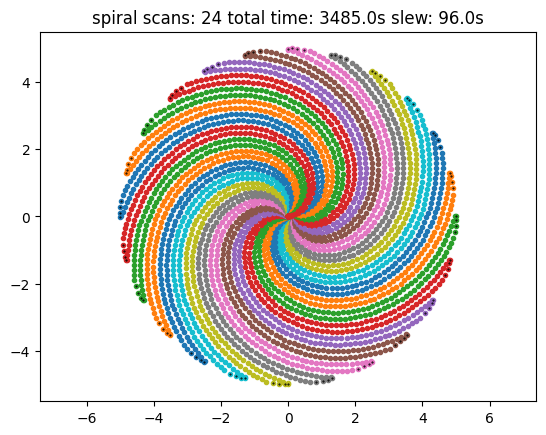

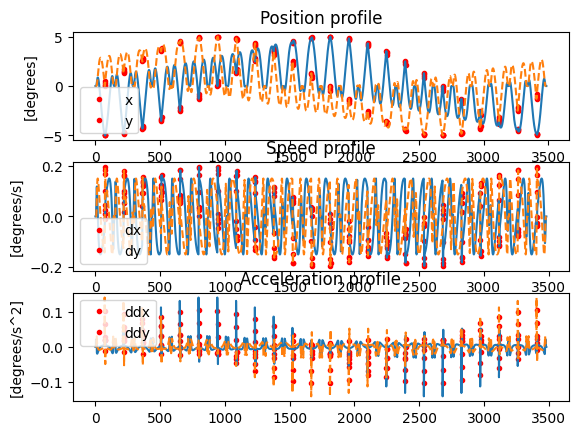

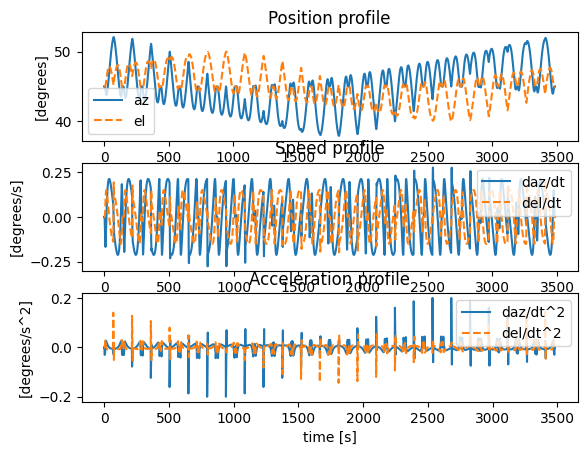

<Figure size 640x480 with 0 Axes>

In [12]:
## Band2
# Low res, 1*1hr
# This pattern with num-cycles=1 works well for both rising and setting targets
simulate_holog("--sampletime 1 --scan-extent 10.0 --cycle-duration 3600 --scanspeed 0.15 --slewspeed -2 --num-cycles 1 --tracktime 5 --twistfactor 1 --high-elevation-slowdown-factor 2")

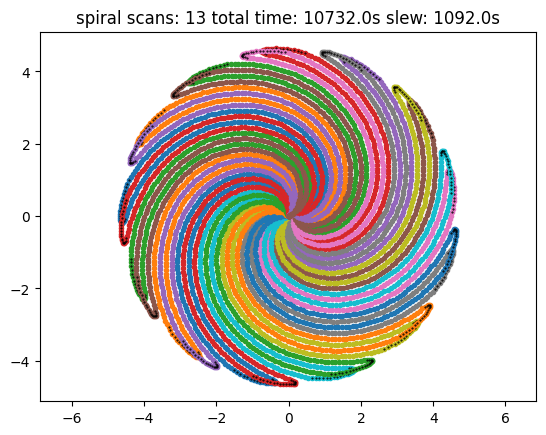

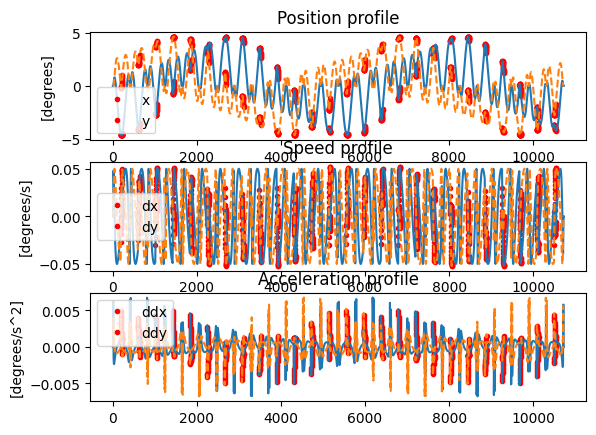

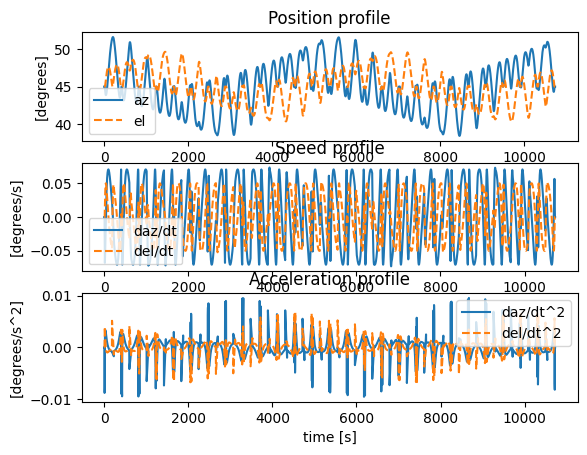

<Figure size 640x480 with 0 Axes>

In [13]:
## S-band
# Low res, 2*1.5hr (num-cycles 2 AND cycle-rotations 2 to create non-overlapping cycles!)
simulate_holog("--sampletime 2 --scan-extent 9.0 --cycle-duration 5400 --scanspeed 0.05 --num-cycles 2 --cycle-rotations 2 --twistfactor 1 --high-elevation-slowdown-factor 2")
# Equivalent to use for setting targets, 1*3hr
#simulate_holog("--sampletime 2 --scan-extent 9.0 --cycle-duration 10800 --scanspeed 0.05 --num-cycles 1 --cycle-rotations 2 --twistfactor 1 --high-elevation-slowdown-factor 2")

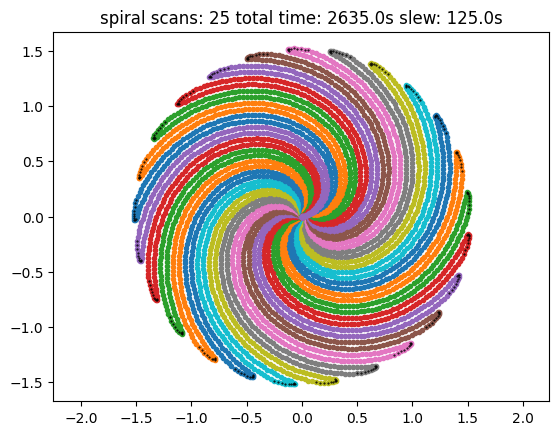

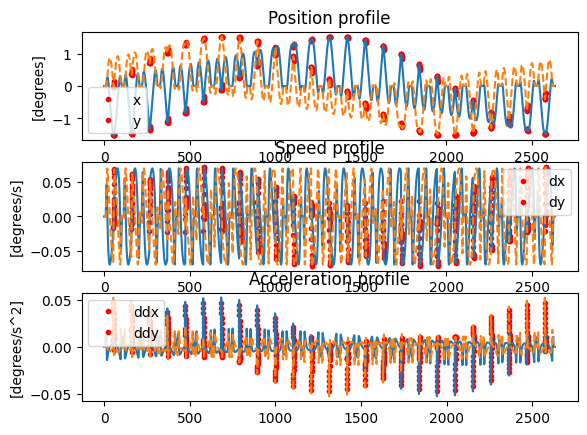

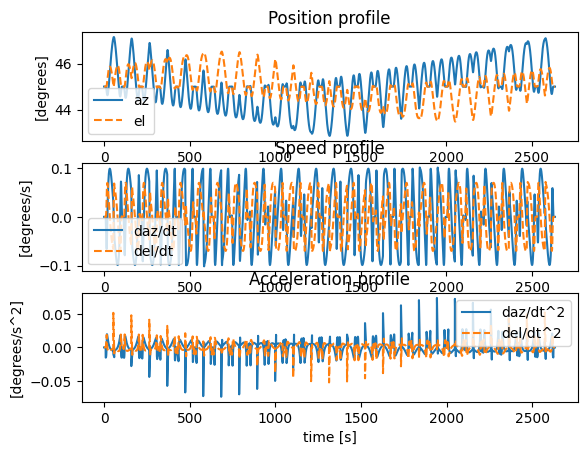

<Figure size 640x480 with 0 Axes>

In [14]:
## Ku-band
# Moderate res map, 1*45min. 100 sec bore sight intervals. Adequately sampled by a single cycle
simulate_holog("--scan-extent 3.0 --cycle-duration 2700 --scanspeed 0.07 --sampletime 0.5")

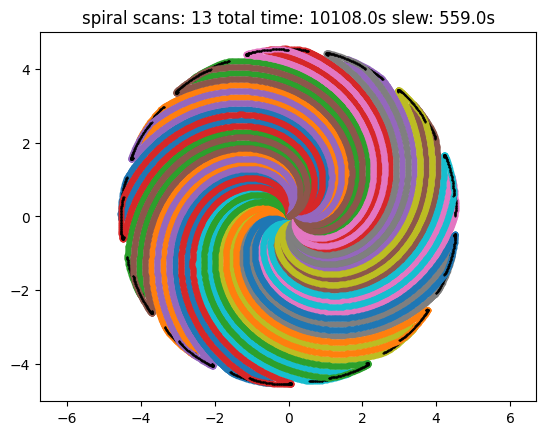

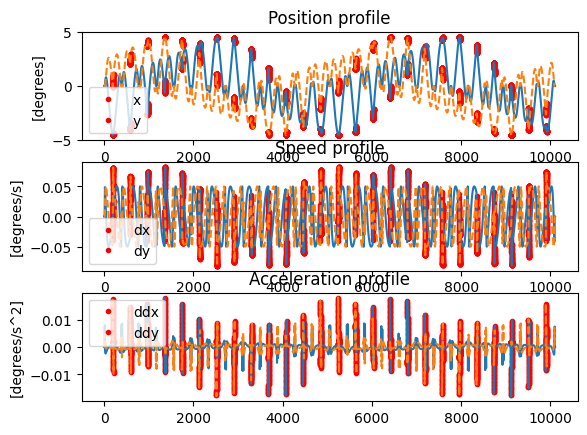

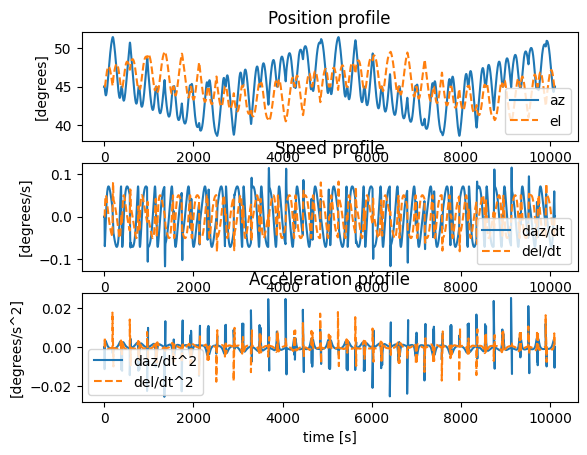

Target az,el at start time [-108.66616866   28.88469583]


(False,
 np.False_,
 np.float64(3975.333084344864),
 np.float64(18.247309522371374),
 np.float64(180.0))

<Figure size 640x480 with 0 Axes>

In [16]:
## Evaluate a specific measurement for elevation limits
simulate_holog("--scan-extent 9 --cycle-duration 5400 --scanspeed 0.05  --slewspeed -2 --tracktime 10 --num-cycles 2 --cycle-rotation 2 --twistfactor 1 --high-elevation-slowdown-factor 1",
               "PKS J1924-2914, radec, 19:24:0, -29:14:0", katpoint.Timestamp("2024-07-26 02:30:0").secs)